# Install Libraries

In [14]:
#!conda install scipy -y
#!conda install statsmodels -y

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns  # just to load dataset

# Load Data

In [17]:
peng = sns.load_dataset("penguins")
peng = peng.dropna(subset=["flipper_length_mm","body_mass_g","bill_length_mm","bill_depth_mm","species","island","sex"])
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


# Continuous–Continuous: Visual Description

## Scatter

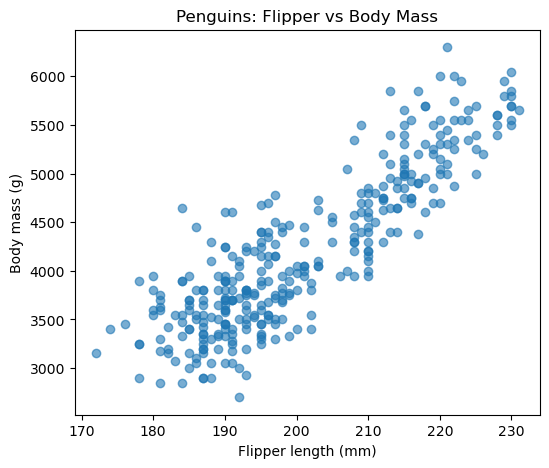

In [18]:
# Scatter
plt.figure(figsize=(6,5))
plt.scatter(peng["flipper_length_mm"], peng["body_mass_g"], alpha=0.6)
plt.xlabel("Flipper length (mm)"); plt.ylabel("Body mass (g)")
plt.title("Penguins: Flipper vs Body Mass")
plt.show()

In [19]:
## Trend

In [20]:

# Plot line
#m,b = np.polyfit(peng["flipper_length_mm"], peng["body_mass_g"], 1)
#xs = np.linspace(peng["flipper_length_mm"].min(), peng["flipper_length_mm"].max(), 200)
#plt.plot(xs, m*xs + b)

#plt.xlabel("Flipper length (mm)"); plt.ylabel("Body mass (g)")
#plt.title("All Species Pooled")
#plt.show()


# Density

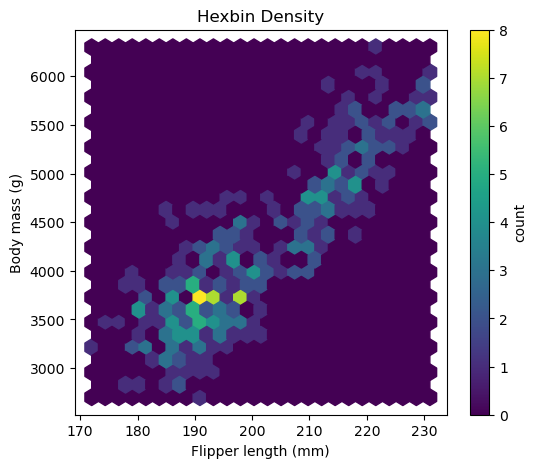

In [21]:
# Hexbin when points overlap a lot
plt.figure(figsize=(6,5))
hb = plt.hexbin(peng["flipper_length_mm"], peng["body_mass_g"], gridsize=25)
plt.xlabel("Flipper length (mm)")
plt.ylabel("Body mass (g)")
plt.title("Hexbin Density")
plt.colorbar(label="count") 
plt.show()

## Correlation (Pearson, Spearman, Kendall)

- Pearson r: linear association; sensitive to outliers.
- Spearman ρ: rank correlation; robust to monotonic nonlinear patterns.
- Kendall τ: concordance-based; more robust, often smaller magnitude.
    

In [23]:
# turn a pandas column into a NumPy array for numerical/statistical functions needed for stats package
x = peng["flipper_length_mm"].to_numpy()
y = peng["body_mass_g"].to_numpy()

pearson_r, pearson_p = stats.pearsonr(x, y)
spearman_rho, spearman_p = stats.spearmanr(x, y)
kendall_tau, kendall_p = stats.kendalltau(x, y)

print(f"Pearson r={pearson_r:.3f} (p={pearson_p:.3g})")
print(f"Spearman ρ={spearman_rho:.3f} (p={spearman_p:.3g})")
print(f"Kendall τ={kendall_tau:.3f} (p={kendall_p:.3g})")

# The p-value is the probability—assuming the null hypothesis is true—of obtaining a test statistic 
# at least as extreme as the one you observed, just by random sampling variation.

Pearson r=0.873 (p=3.13e-105)
Spearman ρ=0.840 (p=4.63e-90)
Kendall τ=0.661 (p=5.65e-70)


# Linear Regression = Correlation with Superpowers

Model:


In [7]:
m = smf.ols("body_mass_g ~ flipper_length_mm", data=peng).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):          3.13e-105
Time:                        13:57:09   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.28

# Correlation Matrix & Quick Heat View

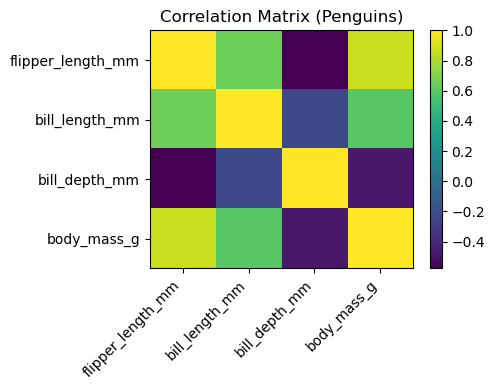

In [8]:
num_cols = ["flipper_length_mm","bill_length_mm","bill_depth_mm","body_mass_g"]
corr = peng[num_cols].corr(numeric_only=True)
corr

# Simple heat map with matplotlib
plt.figure(figsize=(5,4))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Matrix (Penguins)")
plt.colorbar(); plt.tight_layout(); plt.show()

# Regression

In [9]:
# 1) Simple OLS (linked to Pearson r and R^2)
m = smf.ols("body_mass_g ~ flipper_length_mm", data=peng).fit()


β1 (g per mm): 50.15  | R^2: 0.762


## Visualize the model

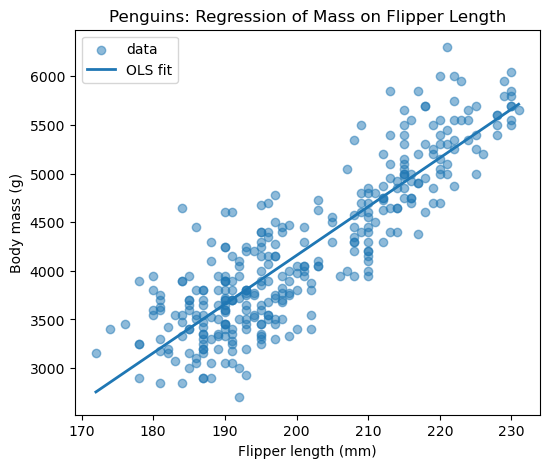

In [13]:
xs = np.linspace(peng.flipper_length_mm.min(), peng.flipper_length_mm.max(), 200)
ys = m.params.Intercept + m.params.flipper_length_mm * xs
plt.figure(figsize=(6,5))
plt.scatter(peng.flipper_length_mm, peng.body_mass_g, alpha=0.5, label="data")
plt.plot(xs, ys, lw=2, label="OLS fit")
plt.xlabel("Flipper length (mm)"); plt.ylabel("Body mass (g)")
plt.title("Penguins: Regression of Mass on Flipper Length"); plt.legend(); plt.show()